In [77]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor

# Hồi quy tuyến tính

$$ \Large \widehat{y} = h_{\theta} (x) = \theta \cdot x $$

* $ \theta $: Vector  tham  số  của mô hình: $[\theta_0,\theta_1,...\theta_x] $ 
* x: Vector  đặc  trưng  của  mẫu : chứa $x_0$ đến $x_n,x_0 = 1$ 
* $ \theta \cdot x:$ Tích vô hướng : $\theta_0 \cdot x_0 +\theta_1 \cdot x_1 + ... + \theta_n \cdot x_n$ 

`Mục tiêu`: cực tiểu hóa Mean Squared Error

$$ MSE(X,h_{\theta}) = \frac{1}{m} * \sum_{i=1}^{m}{(\theta^T x^{i} - y^{i})^2} $$

## Phương trình pháp tuyến

Tìm $ \widehat{\theta} $ để cực tiểu hóa hàm mất mát

$$ \widehat{\theta} = (X^T X)^{-1}X^Ty $$
* $ \widehat{\theta}$ là giá trị của $\theta$ làm cho hàm mất mát đạt cực tiểu
* y là vector chứa các nhãn từ $y^{1}$ đến $y^{n}$


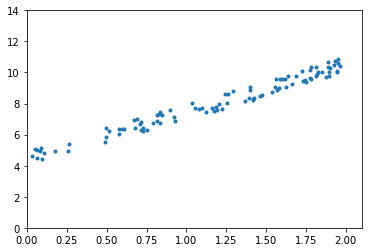

In [17]:
x = 2*np.random.rand(100,1)
y = 3*x + 4 + np.random.rand(100,1)
plt.xlim(0,2.1)
plt.ylim(0,14)
plt.plot(x,y,'.')

In [18]:
x_0 = np.ones((100,1))
X = np.c_[x_0,x] # add x_0 ứng với theta0

In [19]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

hàm số chúng ta dùng để tạo dữ liệu là: y = 3x+4+gauss

In [20]:
theta

array([[4.48886523],
       [2.99355235]])

kết quả mong muốn là $ \theta_0 = 4 $ và $\theta_1 = 3$ => gần đúng( Nhiễu gauss khiến cho việc tìm các tham số của hàm gốc trở nên bất khả thi)

In [21]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
X_new_b # tai x = 0 va x = 2

array([[1., 0.],
       [1., 2.]])

In [22]:
y_pred = X_new_b.dot(theta) # tich vo huong(nhan vector)
y_pred

array([[ 4.48886523],
       [10.47596992]])

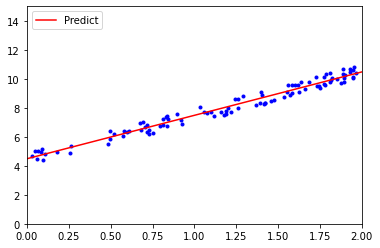

In [23]:
plt.plot(x,y,'b.')
plt.plot(X_new,y_pred,'r-',label = 'Predict')
plt.axis([0,2,0,15])
plt.legend(loc = 'upper left')

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

hệ số điều chỉnh ($\theta_0$) và các $\theta_n$

In [25]:
lin_reg.intercept_,lin_reg.coef_

(array([4.48886523]), array([[2.99355235]]))

In [26]:
lin_reg.predict(X_new)

array([[ 4.48886523],
       [10.47596992]])

Lớp Linear Regression được dựa trên hàm `np.linalg.lstsq` ( 'least squared')

In [27]:
theta_best_svd,residuals,rank,a = np.linalg.lstsq(X,y)

C:\Users\quypr\AppData\Local\Temp/ipykernel_1984/3920820320.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta_best_svd,residuals,rank,a = np.linalg.lstsq(X,y)


In [28]:
theta_best_svd

array([[4.48886523],
       [2.99355235]])

Hàm này tính $\widehat{\theta} = X^{+}y$
* Trong đó  $X^{+}$ là ma trận giả nghịch đảo của X

In [29]:
np.linalg.pinv(X).dot(y)

array([[4.48886523],
       [2.99355235]])

# Hạ Gradient

## Hạ Gradient theo Batch

Đạo hàm riêng hàm chi phí
$$ \frac{\partial}{\partial\theta_j}MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m}{(\theta^T x^{i}-y^{i})x_{j}^{i}}$$

Vector gradient của hàm chi phí
$$\triangledown_{\theta}MSE(\theta) = \left(\begin{array}{cc} \frac{\partial}{\partial\theta_0} MSE(\theta) \\ \frac{\partial}{\partial\theta_1} MSE(\theta) \\ ... \\ \frac{\partial}{\partial\theta_n} MSE(\theta) \end{array} \right) = \frac{2}{m}X^T(X\theta-y)$$

Kích thước mỗi bước cập nhật: $\triangledown_{\theta} $ tỉ lệ thuận $ \triangle$, mục tiêu: giảm $\triangledown_{\theta}$ đến 0 (đạo hàm)
$$\theta^{(bước \ tiếp \ theo)} = \theta - \eta\triangledown_{\theta}MSE(\theta)$$

In [30]:
theta_bgd = []
def plot_gradient(theta,n_iterations=1000,eta = 0.1,theta_bgd = None):
    m = X.shape[0]
    plt.plot(x,y,'b.')
    for i in range(n_iterations):
        if i < 10:
            y_predict = np.dot(X_new_b,theta) # head,tail
            style  = 'b-' if i > 0 else 'r--' 
            plt.plot(X_new,y_predict,style)
        gradient = (2/m)*np.dot(X.T,(np.dot(X,theta)-y))
        theta = theta - eta*gradient
        if theta_bgd is not None:
            theta_bgd.append(theta)
    plt.axis((0,2,0,15))
    plt.xlabel('$X$',fontsize = 15)
    plt.ylabel('$Y$',fontsize = 15,rotation='horizontal')
    plt.title('eta = {}'.format(eta))
    

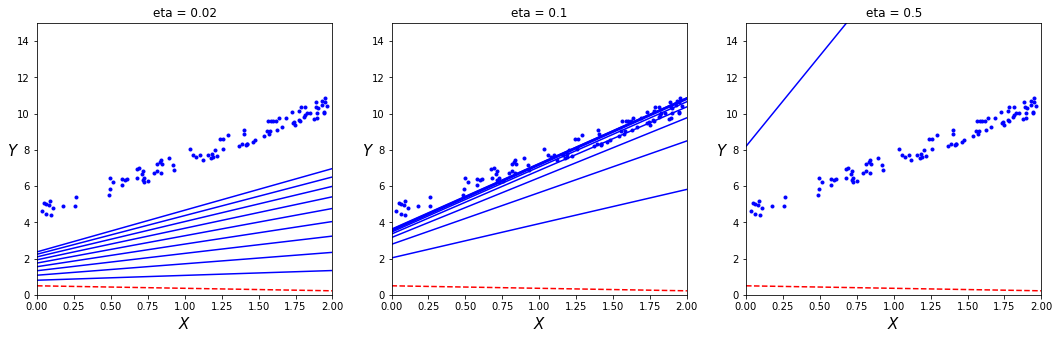

In [31]:
np.random.seed(42)
theta = np.random.randn(2,1)
plt.figure(figsize=(18,5))
plt.subplot(131);plot_gradient(theta,eta = 0.02)
plt.subplot(132);plot_gradient(theta,eta = 0.1,theta_bgd = theta_bgd)
plt.subplot(133);plot_gradient(theta,eta = 0.5)


## Hạ Gradient ngẫu nhiên

In [32]:
epochs = 50
m = X.shape[0]

t0,t1 = 5,50 # learning schedule para
def learning_schedule(t):
    return t0/(t+t1)

Text(0, 0.5, '$Y$')

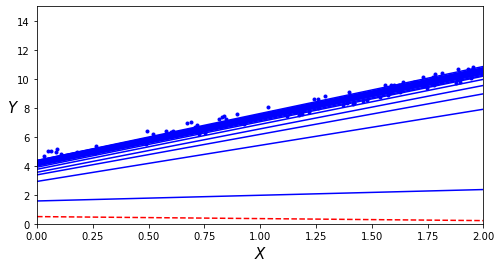

In [33]:
plt.figure(figsize = (8,4))
plt.plot(x,y,'b.')
plt.axis((0,2,0,15))
np.random.seed(42)
theta = np.random.randn(2,1)
theta_rad = []
for epoch in range(epochs):
    for i in range(m):
        if epoch == 0 and i < 30:
            y_pred = np.dot(X_new_b,theta)
            styles = 'b-' if i >0 else 'r--'
            plt.plot(X_new,y_pred,styles)
        rand = np.random.randint(m)
        eta = learning_schedule(epoch*m+i) 
        xi = X[rand:rand+1]
        yi = y[rand:rand+1]
        gradient = (2) * np.dot(xi.T,np.dot(xi,theta)-yi)
        theta = theta - eta*gradient
        theta_rad.append(theta)
plt.xlabel("$X$",fontsize = 15)
plt.ylabel("$Y$",rotation = 0,fontsize = 15)

## Hạ Gradient theo Mini-Batch


array([[4.49878494],
       [3.00134984]])

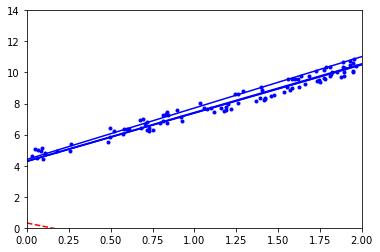

In [34]:
theta = np.random.randn(2,1)
theta_mini = []
plt.plot(x,y,'b.')
plt.axis([0,2,0,14])
epochs = 50
np.random.seed(42)

m = X.shape[0]
mini_patch_size = 20
t0,t1 = 200,1000
t=0

for epoch in range(epochs):
    shuffle = np.random.permutation(m)
    X_shuffle = X[shuffle]
    Y_shuffle = y[shuffle]
    for i in range(0,m,mini_patch_size):
        if epoch ==0 :
            style = 'r--' if i==0 and epoch ==0 else 'b-'
            plt.plot(X_new,np.dot(X_new_b,theta),style)
        t += 1
        xi = X_shuffle[i:i+mini_patch_size]
        yi = Y_shuffle[i:i+mini_patch_size]
        eta = learning_schedule(t)
        gradient = 2/mini_patch_size*np.dot(xi.T,(np.dot(xi,theta)-yi))
        theta = theta - eta*gradient
        theta_mini.append(theta)
theta

In [35]:
theta_bgd = np.array(theta_bgd)
theta_mini = np.array(theta_mini)
theta_rad = np.array(theta_rad)

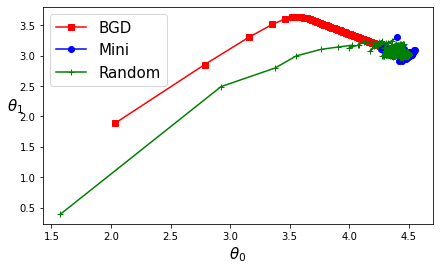

In [36]:
plt.figure(figsize = (7,4))
plt.plot(theta_bgd[:,0],theta_bgd[:,1],'r-s',label = 'BGD')
plt.plot(theta_mini[:,0],theta_mini[:,1],'b-o',label = 'Mini')
plt.plot(theta_rad[:,0],theta_rad[:,1],'g-+',label = 'Random')
plt.xlabel("$\\theta_0$",fontsize = 15)
plt.ylabel("$\\theta_1$",fontsize = 15,rotation = 0)
plt.legend(loc = 'upper left',fontsize = 15)

## Hồi quy đa thức

* Thêm các bậc lũy thừa vào mỗi đặc trưng, coi chúng như là đặc trưng mới, sau đó train trên đặc trưng này
* Có khả năng tìm ra mối quan hệ giữa các đặc trưng do `Poly` thêm vào tất cả tổ hợp của các đặc trưng (tổng bậc số hạng <= bậc cho trước)
    * Ví dụ: với a,b và `Poly` có degree = 3 không chỉ thêm $a^2,a^3,b^2,b^3$ mà còn thêm $ab,a^{2}b,ab^2$
* Degree = d sẽ biến đổi mảng $\textit{n}$ đặc trưng thành 1 mảng $\frac{(n+d)!}{d!n!} $

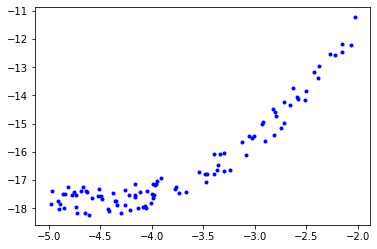

In [76]:
x = 3*np.random.rand(100,1) - 5
y = (x**2) + 9*x + np.random.rand(100,1) + 2
plt.plot(x,y,'b.')

In [38]:
from sklearn.preprocessing import PolynomialFeatures
polyfea = PolynomialFeatures(degree = 2,include_bias=False) 
x_new = polyfea.fit_transform(x)
x_new[0]

array([-2.30528581,  5.31434266])

In [39]:
lin_reg.fit(x_new,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.13075176]), array([[8.8121047 , 0.97873539]]))

=> c,b,a

In [40]:
x_new_plot = np.linspace(-6,6,100).reshape(100,1)
x_new_pred = polyfea.transform(x_new_plot)

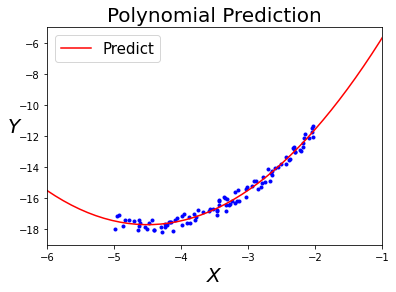

In [41]:
plt.axis([-6,-1,-19,-5])
plt.title("Polynomial Prediction",fontsize = 20)
plt.xlabel("$X$",fontsize = 20)
plt.ylabel("$Y$",fontsize = 20,rotation = 0)
plt.plot(x,y,'b.')
plt.plot(x_new_plot,lin_reg.predict(x_new_pred),'r-',label = "Predict")
plt.legend(loc = "upper left",fontsize = 15)

## Đồ thị quá trình học

C:\Users\quypr\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
C:\Users\quypr\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


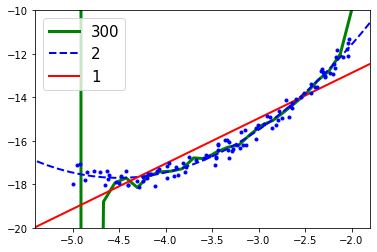

In [42]:
for style,degree,linewidth in (('g-',300,3),('b--',2,2),('r-',1,2)):
    pipeline_poly = Pipeline([
        ("poly_feature",PolynomialFeatures(degree = degree,include_bias=False)),
        ('scaler',StandardScaler()),
        ("linear",LinearRegression())
        ])
    pipeline_poly.fit(x,y)
    y_pred = pipeline_poly.predict(x_new_plot)
    plt.plot(x_new_plot,y_pred,style,linewidth=linewidth,label = degree)
    plt.legend(loc = 'upper left',fontsize = 15)
plt.axis([-5.4,-1.8,-20,-10])
plt.plot(x,y,'b.')

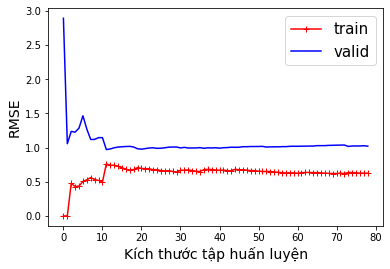

In [43]:
def plot_learning_curves(model,x,y):
    train_error,valid_error = [],[]
    x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size=0.2,random_state = 10)
    for i in range(1,len(x_train)):
        model.fit(x_train[:i],y_train[:i])
        train_error.append(mean_squared_error(y_train[:i],model.predict(x_train[:i])))
        valid_error.append(mean_squared_error(y_valid,model.predict(x_valid)))
    plt.plot(np.sqrt(train_error),'r-+',label = 'train')
    plt.plot(np.sqrt(valid_error),'b-',label = 'valid')
    plt.legend(loc = 'upper right',fontsize = 15)
plt.xlabel("Kích thước tập huấn luyện",fontsize = 14)
plt.ylabel("RMSE",fontsize = 14)
plot_learning_curves(lin_reg,x,y)


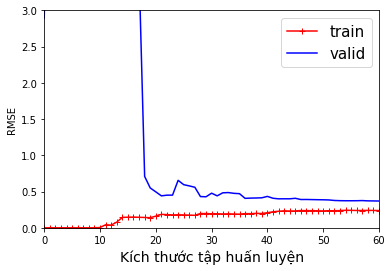

In [44]:
poly_regress = Pipeline([
    ("poly",PolynomialFeatures(degree = 10,include_bias= False)),
    ("lin_reg",LinearRegression())
])
plt.axis([0,60,0,3])
plt.xlabel("Kích thước tập huấn luyện",fontsize = 14)
plt.ylabel("RMSE")
plot_learning_curves(poly_regress,x,y)

### Đánh đổi Độ chệch/Phương sai
* Độ chệch (Bias): Phần này của sai số khái quát hóa bắt nguồn từ việc đặt sai giả thuyết, chẳng hạn như cho rằng dữ liệu là tuyến tính trong khi nó thực chất là bậc 2. Một mô hình có độ chệch cao rất có thể dưới khớp dữ liệu huấn luyện.
* Phương sai (Variance): Phần này đến từ việc mô hình cực kì nhạy với những thay đổi trong dữ liệu huấn luyện. Một mô hình với bậc tự do cao (Một đa thức bậc cao) sẽ có khả năng biến đổi linh hoạt và vì thế trở nên quá khớp với dữ liệu huấn luyện. 
* Sai số bất khả giảm (Irreducible Error): Phần này đến từ chính sự nhiễu loạn trong dữ liệu. Cách duy nhất để giảm sai số loại này đó là làm sạch dữ liệu.


`=> Tăng độ phức tạp của mô hình thường sẽ tăng phương sai và giảm độ chệch của nó. Ngược lại giảm độ phức tạp của mô hình sẽ tăng độ chệch và giảm phương sai.  `

# Mô hình tuyến tính điều chuẩn

## Hồi quy Ridge (Điều chuẩn Tikhonov)

* Là một phiên bản được điều chuẩn của `hồi quy tuyến tính`.
* Tham số điều chuẩn (regularization term) : $\alpha\sum_{i=1}^{n}{\theta_{i}^2}$ được thêm vào hàm chi phí.
* Tham số điều chuẩn chỉ nên được thêm vào hàm chi phí cho quá trình huấn luyện. Sau khi huấn luyện, chất lượng mô hình nên được đánh giá với hàm chi phí không dùng điều chuẩn.
* Việc co giãn dữ liệu (StandardScaler) trước khi thực hiện hồi quy Ridge rất quan trọng, bởi vì mô hình này nhạy cảm với tỉ lệ của các đặc trưng đầu vào. Hầu hết các mô hình được điều chuẩn đều như vậy.

$$ J(\theta) = MSE(\theta) + \alpha\frac{1}{2}\sum_{i=1}^{n}{\theta_{i}^2} $$

C:\Users\quypr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept={'random_state': 42} as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\quypr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept={'random_state': 42} as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\quypr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept={'random_state': 42} as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\quypr\Anaconda3\lib\site-packages\sklearn\utils\validation

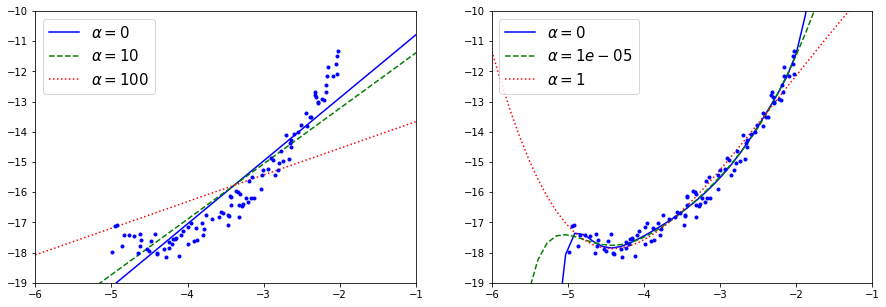

In [70]:
def plot_model(model_class,polynomial,x,y,alphas,**model_arg):
    for alpha,style in zip(alphas,("b-","g--",'r:')):
        model = model_class(alpha,model_arg)
        if polynomial:
            model = Pipeline([
                ("poly_fea",PolynomialFeatures(degree = 10,include_bias = False)),
                ("std_scale",StandardScaler()),
                ("model",model)
            ]) 
        x_new_plot = np.linspace(-6,6,100).reshape(100,1)
        model.fit(x,y)
        plt.plot(x_new_plot,model.predict(x_new_plot),style,label = r"$\alpha = {}$".format(alpha))
        plt.legend(loc = 'upper left',fontsize = 15)
    plt.plot(x,y,'b.')
    plt.axis([-6,-1,-19,-10])

plt.figure(figsize = (15,5))
plt.subplot(121)    
plot_model(Ridge,False,x,y,(0,10,100),random_state = 42)
plt.subplot(122)
plot_model(Ridge,True,x,y,(0,10**-5,1),random_state = 42)


### Phương trình dạng đóng
$$\widehat{\theta} = (X^{T}X+\alpha A)^{-1}X^{T}y$$

Trong đó: A là ma trận đơn vị với kích thước (n+1)x(n+1), nhưng có phần tử ở góc trên bên trái bằng 0 tương ứng với hệ số điều chỉnh

In [88]:
ridge_reg = Ridge(alpha=1,solver = 'cholesky',random_state=42) # sử dụng kĩ thuật phân rã ma trận của Cholesky
ridge_reg.fit(x,y)
ridge_reg.predict([[1]])


array([[-7.83939524]])

**Lưu ý**: để thống nhất với phiên bản trong tương lai, chúng ta đặt `max_iter=1000` và `tol=1e-3` bởi chúng là các giá trị mặc định trong Scikit-Learn 0.21

In [92]:
sgd_reg = SGDRegressor(penalty = 'l2',max_iter=1000,tol=10**-3,random_state=42) #penalty quyết định loại điều chuẩn được dùng (l2)
sgd_reg.fit(x,y)
sgd_reg.predict([[1]])

C:\Users\quypr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([-4.76101411])